In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [4]:
df= pd.read_csv('Data/stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.rename(columns={
    'race/ethinicity':'race'
}, inplace= True)


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X= df.drop(columns=['math score'])

X.shape

(1000, 7)

In [8]:
X.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74


In [9]:
y= df['math score']


In [10]:
numerical_features= X.select_dtypes(exclude= 'O').columns

categorical_features= X.select_dtypes(include='O').columns

numerical_features, categorical_features

(Index(['reading score', 'writing score'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course'],
       dtype='object'))

In [11]:
from sklearn.compose import ColumnTransformer

numerical_transfer=  StandardScaler()
categorical_transfer= OneHotEncoder()

ct= ColumnTransformer([
    ('StandardScaler', numerical_transfer, numerical_features ),
    ('OneHotEncoder', categorical_transfer, categorical_features),
])



In [12]:
X= ct.fit_transform(X)


In [13]:
X.shape

(1000, 19)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.2, random_state= 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.linear_model import LinearRegression

In [16]:
def evaluate_function( true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_score_value= r2_score(true, predicted)

    return mae,  rmse, r2_score_value





In [17]:
models= {
    'Linear Regression':LinearRegression(),
    'Lasso': Lasso(),
    'ridge':Ridge(),
    'SVM': SVR(),
    'KNNeighbours': KNeighborsRegressor(),
    'Decsion Tree Regressor': DecisionTreeRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()

}

list(models)

['Linear Regression',
 'Lasso',
 'ridge',
 'SVM',
 'KNNeighbours',
 'Decsion Tree Regressor',
 'AdaBoost Regressor']

In [18]:
model_list= []
r2_list= []

for i in range( len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train, y_train)

    # make Predictions

    y_train_predict= model.predict(X_train)
    y_test_predict= model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_function(y_train, y_train_predict)

    model_test_mae , model_test_rmse , model_test_r2=  evaluate_function(y_test, y_test_predict)
    

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    

    print('Model Perfomance Training Set:')
    print('Root Mean Squared Error{:.4f}'.format(model_train_rmse))
    print('Mean Absolute Error {:.4f}'.format(model_train_mae))
    print('R2_score{:.4f}'.format(model_train_r2))

    print('-'*35)
    print('Model Perfomance Testing Set:')
    print('Root Mean Squared Error{:.4f}'.format(model_test_rmse))
    print('Mean Absolute Error:{:.4f}'.format(model_test_mae))
    print('R2_score {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)


    print('='*35)
    print('\n')




Linear Regression
Model Perfomance Training Set:
Root Mean Squared Error5.3231
Mean Absolute Error 4.2667
R2_score0.8743
-----------------------------------
Model Perfomance Testing Set:
Root Mean Squared Error5.3940
Mean Absolute Error:4.2148
R2_score 0.8804


Lasso
Model Perfomance Training Set:
Root Mean Squared Error6.5938
Mean Absolute Error 5.2063
R2_score0.8071
-----------------------------------
Model Perfomance Testing Set:
Root Mean Squared Error6.5197
Mean Absolute Error:5.1579
R2_score 0.8253


ridge
Model Perfomance Training Set:
Root Mean Squared Error5.3233
Mean Absolute Error 4.2650
R2_score0.8743
-----------------------------------
Model Perfomance Testing Set:
Root Mean Squared Error5.3904
Mean Absolute Error:4.2111
R2_score 0.8806


SVM
Model Perfomance Training Set:
Root Mean Squared Error6.5770
Mean Absolute Error 4.8692
R2_score0.8081
-----------------------------------
Model Perfomance Testing Set:
Root Mean Squared Error8.1266
Mean Absolute Error:5.4015
R2_score

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_Name','R2_Score']).sort_values(by='R2_Score', ascending= False )

,Model_Name,R2_Score
2,ridge,0.880593
0,Linear Regression,0.880433
6,AdaBoost Regressor,0.847687
1,Lasso,0.825320
4,KNNeighbours,0.783589
5,Decsion Tree Regressor,0.734485
3,SVM,0.728600


In [20]:
linear_model= LinearRegression(fit_intercept= True)
linear_model.fit(X_train, y_train)
y_predicted= linear_model.predict(X_test)
score= r2_score(y_test, y_predicted) * 100
print('Accuracy of the model is {:.2f}%'.format(score))


Accuracy of the model is 88.04%


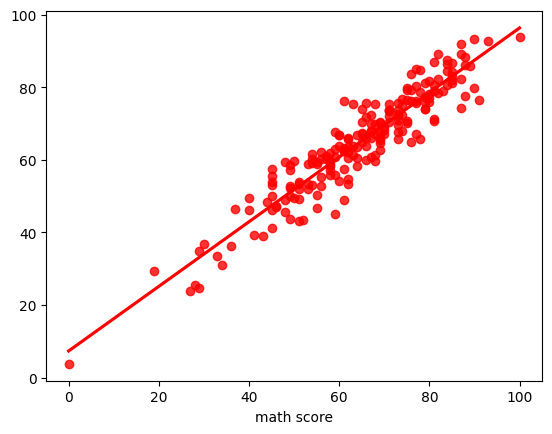

In [25]:
sns.regplot(x=y_test,y=y_predicted ,ci=None,color ='red');